In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ACRB Data.csv")
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [3]:
# null values
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [4]:
df.shape

(341, 16)

In [5]:
# drop null values
df.dropna(inplace=True)

In [6]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [7]:
df.shape

(317, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [9]:
df.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [10]:
x = df.drop('Patient_Status', axis=1)
y = df[['Patient_Status']]

In [11]:
x.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19


In [12]:
y.head()

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Dead


In [13]:
print('Patient Status in 100%')
round(df.Patient_Status.value_counts()*100/len(df),1)

Patient Status in 100%


Alive    80.4
Dead     19.6
Name: Patient_Status, dtype: float64

# Visulization

In [15]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions, hole =.60, 
             title="Patient Status")
figure.show()

In [16]:
Patient_Status.index

Index(['Alive', 'Dead'], dtype='object')

In [17]:
stage = df["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions, hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

In [18]:
histology = df["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

In [19]:
ER_status = df['ER status'].value_counts()
transactions = ER_status.index
quantity = ER_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Patient Status")
figure.show()

In [20]:
PR_status = df['PR status'].value_counts()
transactions = PR_status.index
quantity = PR_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Patient Status")
figure.show()

In [22]:
HER2_status = df['HER2 status'].value_counts()
transactions = HER2_status.index
quantity = HER2_status.values

figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="HER2 status")
figure.show()

In [23]:
y.value_counts()

Patient_Status
Alive             255
Dead               62
dtype: int64

In [24]:
x.drop(['Patient_ID','ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [25]:
x.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [26]:
df.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

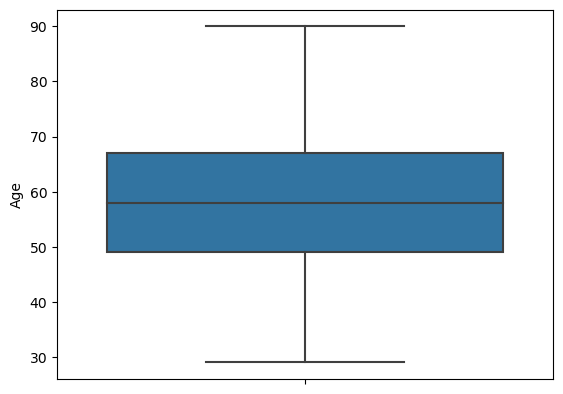

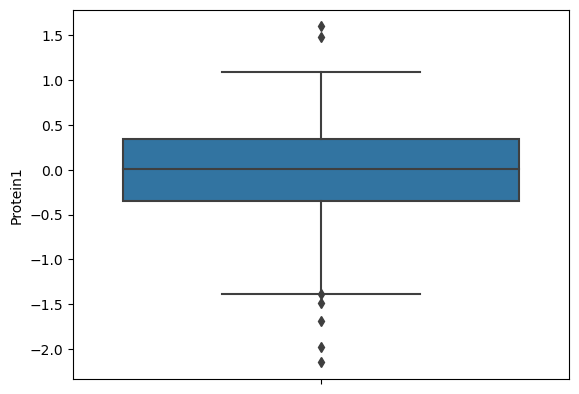

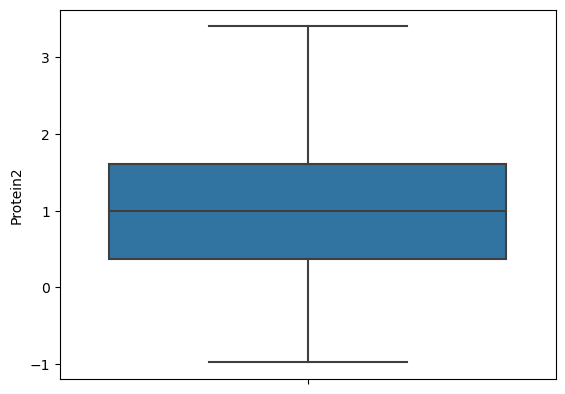

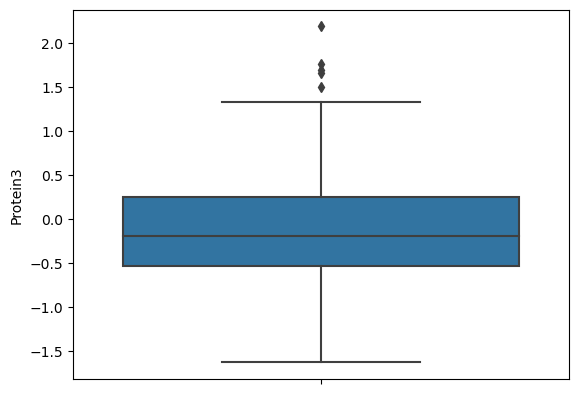

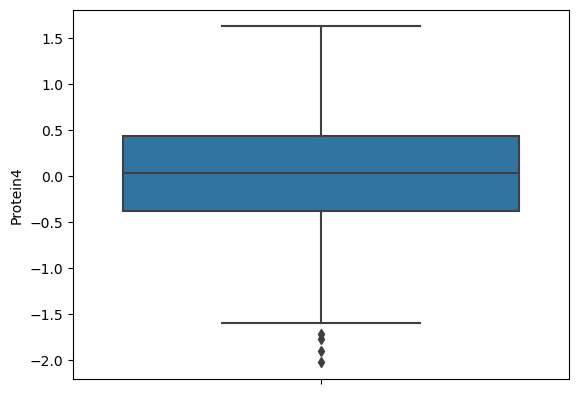

In [28]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
    plt.figsize=(10,5)
    sns.boxplot(y = x[i])
    plt.show()

In [ ]:
#!pip install pandas-profiling

In [29]:
import pandas_profiling
from pandas_profiling import ProfileReport
ProfileReport(x, title="EDA Report of Breast Cancer Dataset")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#!pip install pycaret
#!pip install mlflow

In [30]:
from pycaret.classification import *

In [31]:
cancer = setup(data = df, target = 'Patient_Status', 
                  normalize = True, 
                  transformation = True, 
                  log_experiment = True, 
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,6698
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 16)"
5,Transformed data shape,"(317, 22)"
6,Transformed train set shape,"(221, 22)"
7,Transformed test set shape,"(96, 22)"
8,Ordinal features,2
9,Numeric features,5


In machine learning, a "MlflowLogger" typically refers to a component or tool used for recording or logging information during the training process. It helps track various metrics, such as loss values, accuracy, and other performance indicators, over the course of training a machine learning model.

# Buildin ML Models

* 'lr' - Logistic Regression
    * 'knn' - K Neighbors Classifier
    * 'nb' - Naive Bayes
    * 'dt' - Decision Tree Classifier
    * 'svm' - SVM - Linear Kernel
    * 'rbfsvm' - SVM - Radial Kernel
    * 'gpc' - Gaussian Process Classifier
    * 'mlp' - MLP Classifier
    * 'ridge' - Ridge Classifier
    * 'rf' - Random Forest Classifier
    * 'qda' - Quadratic Discriminant Analysis
    * 'ada' - Ada Boost Classifier
    * 'gbc' - Gradient Boosting Classifier
    * 'lda' - Linear Discriminant Analysis
    * 'et' - Extra Trees Classifier
    * 'xgboost' - Extreme Gradient Boosting
    * 'lightgbm' - Light Gradient Boosting Machine
    * 'catboost' - CatBoost Classifier

In [32]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2000,0.5108,1.0000,0.2000,0.3333,0.0000,0.0000
1,0.3864,0.7465,1.0000,0.2286,0.3721,0.1081,0.2390
2,0.2273,0.5955,1.0000,0.1905,0.3200,0.0209,0.1029
3,0.2045,0.4905,1.0000,0.2045,0.3396,0.0000,0.0000
4,0.2045,0.6000,1.0000,0.2045,0.3396,0.0000,0.0000
Mean,0.2445,0.5887,1.0000,0.2056,0.3409,0.0258,0.0684
Std,0.0715,0.0903,0.0000,0.0126,0.0171,0.0419,0.0942


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
x.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [34]:
y.head()

,Patient_Status
0,Alive
1,Dead
2,Alive
3,Alive
4,Dead


# Random Over Sampler

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)

In [36]:
x_resampled.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other


In [37]:
x_resampled.shape

(510, 10)

In [38]:
y_resampled.shape

(510, 1)

In [39]:
df2 = pd.concat([x_resampled, y_resampled], axis=1)
df2.shape

(510, 11)

In [40]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Lumpectomy,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Other,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Modified Radical Mastectomy,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead


In [41]:
cancer2 = setup(data = df2, target = 'Patient_Status', 
                  normalize = True, 
                  transformation = True, 
                  log_experiment = True, 
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,2032
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 11)"
5,Transformed data shape,"(510, 18)"
6,Transformed train set shape,"(357, 18)"
7,Transformed test set shape,"(153, 18)"
8,Ordinal features,2
9,Numeric features,5


In [42]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9668,0.8889,0.8889,0.8889,0.7778,0.7778
1,0.8750,0.9225,0.8889,0.8649,0.8767,0.7500,0.7503
2,0.9155,0.9952,1.0000,0.8571,0.9231,0.8305,0.8427
3,0.9437,0.9774,0.9444,0.9444,0.9444,0.8873,0.8873
4,0.9437,0.9849,0.9714,0.9189,0.9444,0.8874,0.8888
Mean,0.9133,0.9694,0.9387,0.8949,0.9155,0.8266,0.8294
Std,0.0280,0.0252,0.0443,0.0328,0.0281,0.0559,0.0565


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
print(rf2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=2032, verbose=0, warm_start=False)


In [44]:
evaluate_model(rf2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [47]:
#df4 = pd.read_json('config (1).json')
#df4

In [ ]:
#tuned_rf = tune_model(rf, optimize = 'Accuracy')

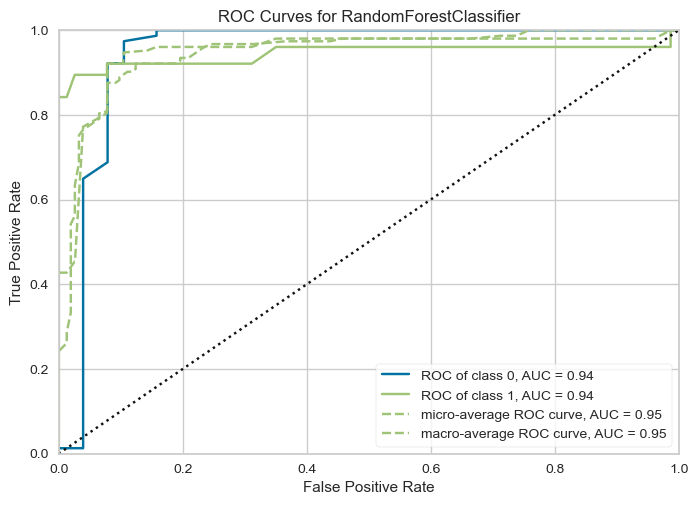

In [48]:
plot_model(rf2, plot = 'auc')

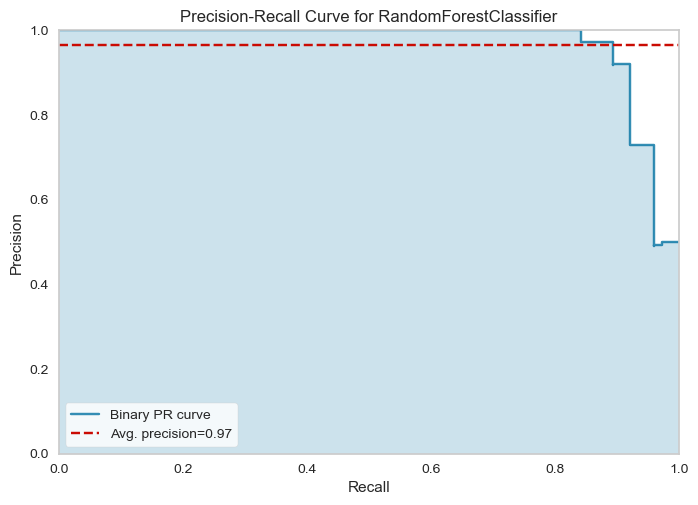

In [49]:
plot_model(rf2, plot = 'pr')

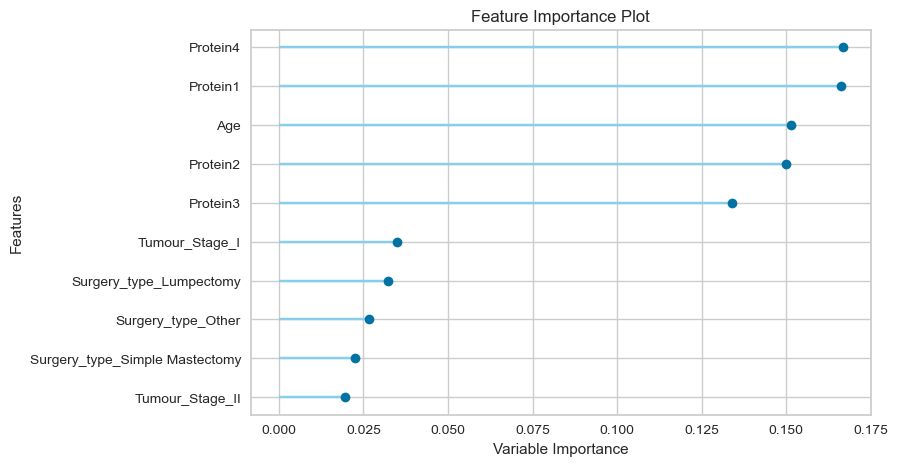

In [50]:
plot_model(rf2, plot='feature')

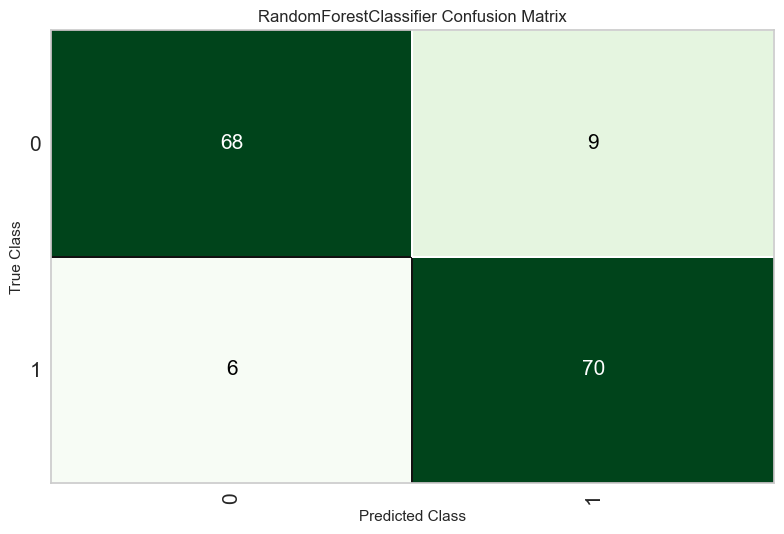

In [51]:
plot_model(rf2, plot = 'confusion_matrix')

In [52]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [53]:
df.shape

(317, 16)

In [55]:
unseen_predictions = predict_model(rf2, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9621,0.9694,0.9621,0.9644,0.9628,0.8839,0.8854


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,0,Dead,0.61
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,1,Dead,1.00
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,0,Alive,0.50
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,0,Alive,0.88
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,1,Dead,0.99


In [56]:
unseen_predictions.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,prediction_label,prediction_score
329,TCGA-AN-A04A,36.0,FEMALE,0.23180,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,1,Dead,0.98
330,TCGA-A8-A085,44.0,MALE,0.73272,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,1,Dead,0.99
331,TCGA-A1-A0SG,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,1,Dead,0.94
332,TCGA-A2-A0EU,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,1,Alive,0.95
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,1,Alive,0.93


# Save the Random Forest model

In [54]:
save_model(rf2, 'model_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=na...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [57]:
from pycaret.classification import load_model
loaded_model = load_model('model_rf')

Transformation Pipeline and Model Successfully Loaded


In [58]:
unseen_predictions = predict_model(loaded_model, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9621,0.9694,0.9621,0.9644,0.9628,0.8839,0.8854


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,0,Dead,0.61
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,1,Dead,1.00
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,0,Alive,0.50
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,0,Alive,0.88
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,1,Dead,0.99
